In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
n = 8
nq = n
nb = n
qc_output = QuantumCircuit(nq, nb)

In [3]:
for i in range(n):
    qc_output.measure(i, i)

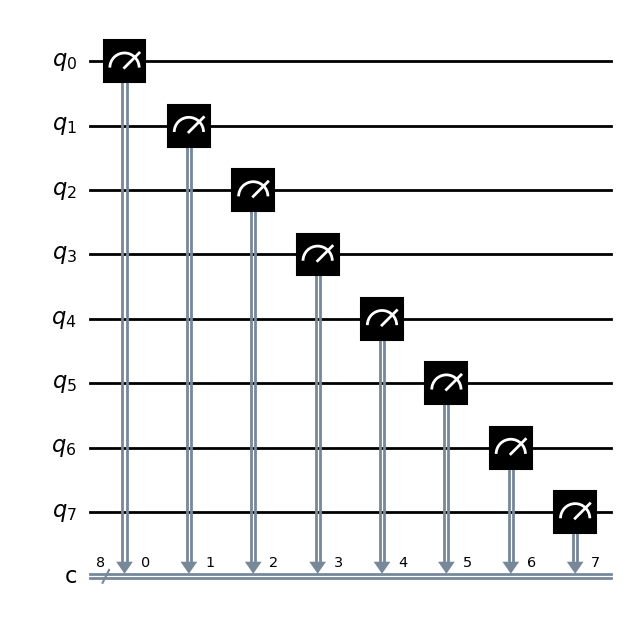

In [4]:
qc_output.draw('mpl')

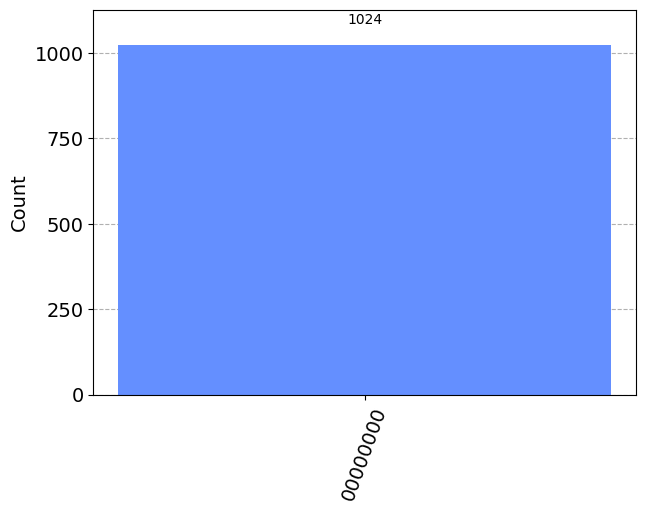

In [5]:
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [6]:
n = 8
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

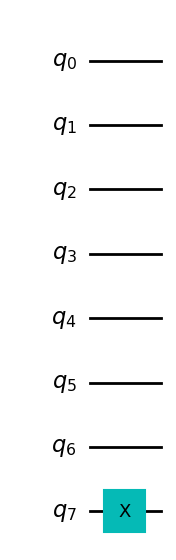

In [7]:
qc_encode.draw('mpl')

/tmp/ipykernel_174451/1358699252.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc_encode + qc_output


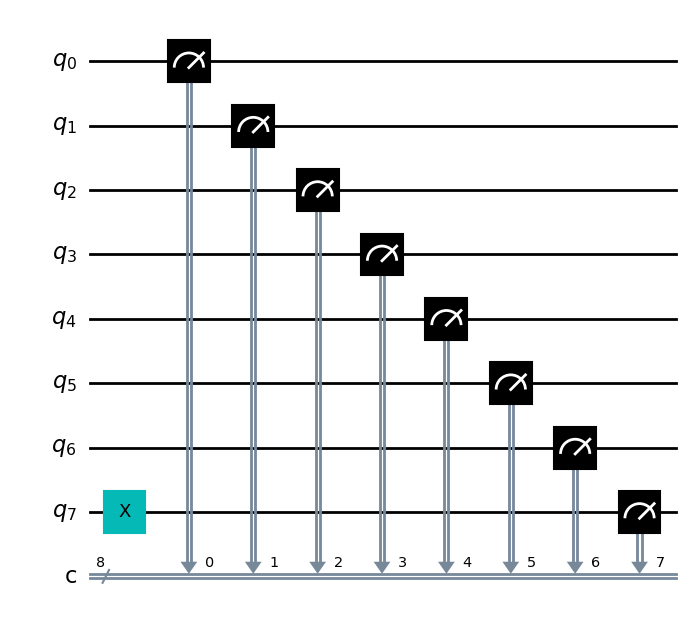

In [8]:
qc = qc_encode + qc_output
qc.draw(output='mpl', justify='none')

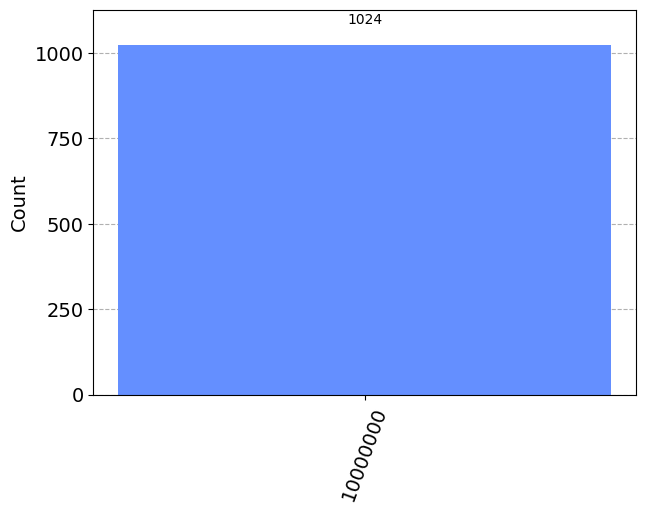

In [9]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

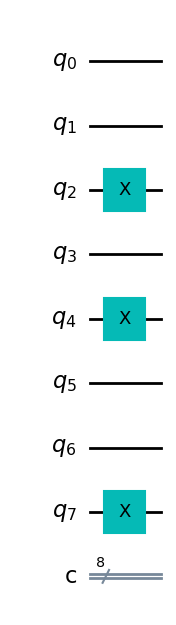

In [10]:
num = QuantumCircuit(8, 8)
num.x(2)
num.x(4)
num.x(7)
num.draw('mpl')

In [11]:
for i in range(8):
    num.measure(i, i)

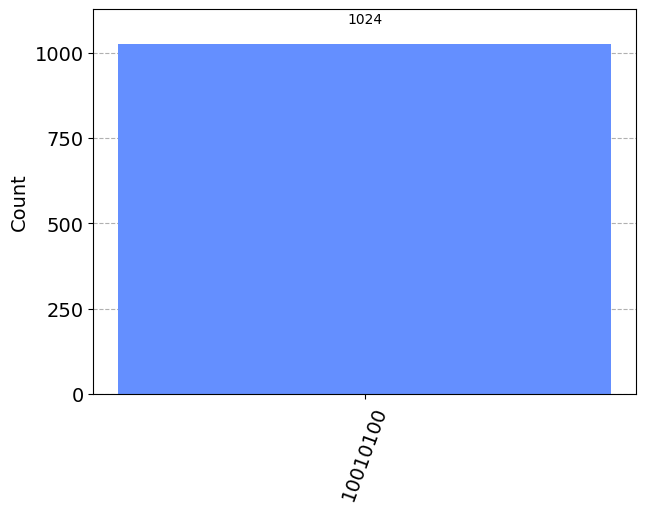

In [12]:
output = execute(num, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(output)

In [14]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)

In [15]:
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [16]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [17]:
output = execute(qc, Aer.get_backend('qasm_simulator'))
print(output)

In [19]:
qc_ha = QuantumCircuit(4, 2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0, 2)
qc_ha.cx(1, 2)

qc_ha.ccx(0, 1, 3)
qc_ha.barrier()

qc_ha.measure(2, 0)
qc_ha.measure(3, 1)

In [20]:
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

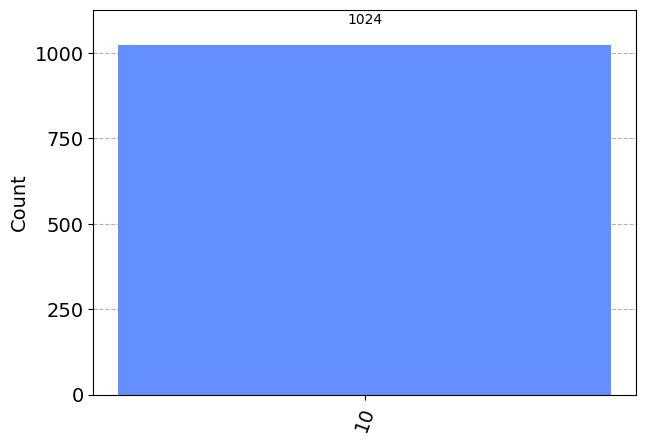

In [21]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [22]:
egl = QuantumCircuit(1)
state = [0, 1]
egl.initialize(state, 0)

In [23]:
egl.draw()

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [24]:
backend = Aer.get_backend('statevector_simulator')
result = execute(egl, backend).result()
out_state = result.get_statevector()
print(out_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [25]:
import math

supstate = [1 / math.sqrt(2), 1j/math.sqrt(2)]
qc_ss = QuantumCircuit(1)
qc_ss.initialize(supstate, 0)
state = execute(qc_ss, backend).result().get_statevector()
print(state)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


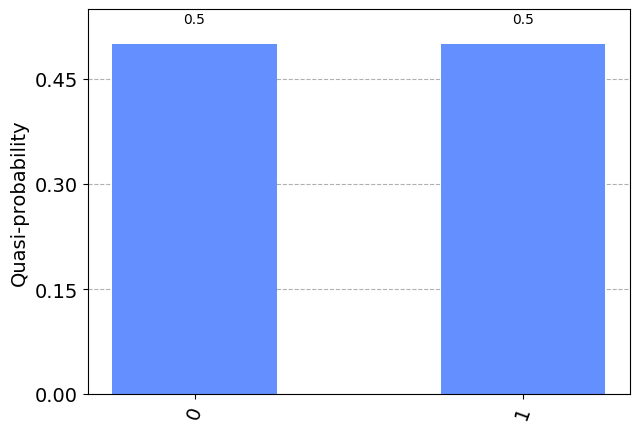

In [26]:
counts = execute(qc_ss, backend).result().get_counts()
plot_histogram(counts)

In [27]:
state1 = [0, 0, 1]
state2 = [0, 0, -1]
state3 = [1, 0, 0]
state4 = [0, -1, 0]
state5 = [0, 1, 0]

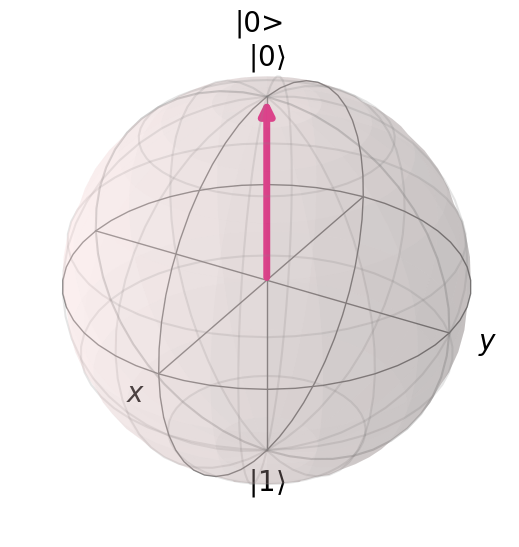

In [28]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector(state1, '|0>')

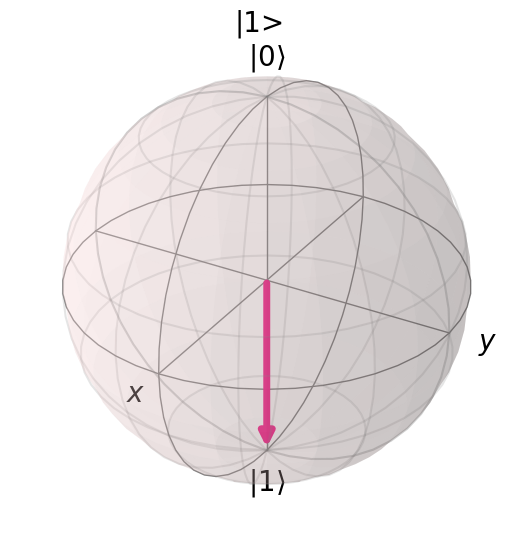

In [29]:
plot_bloch_vector(state2, '|1>')

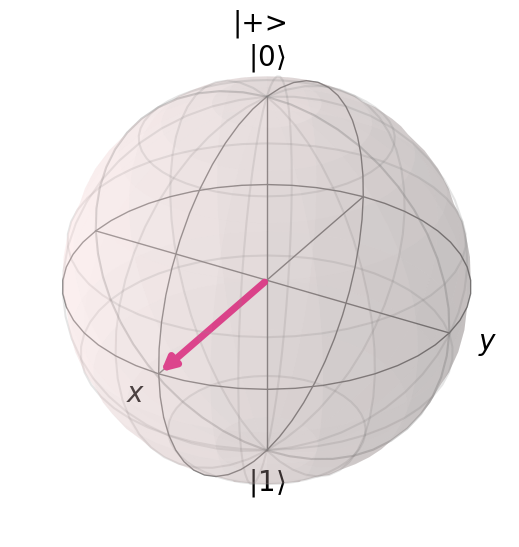

In [30]:
plot_bloch_vector(state3,'|+>')

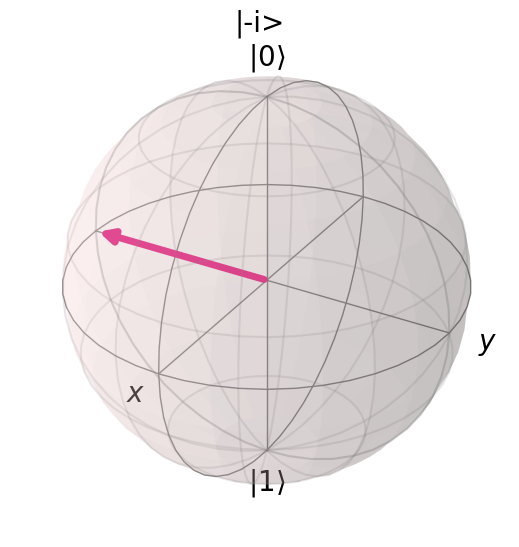

In [31]:
plot_bloch_vector(state4,'|-i>')

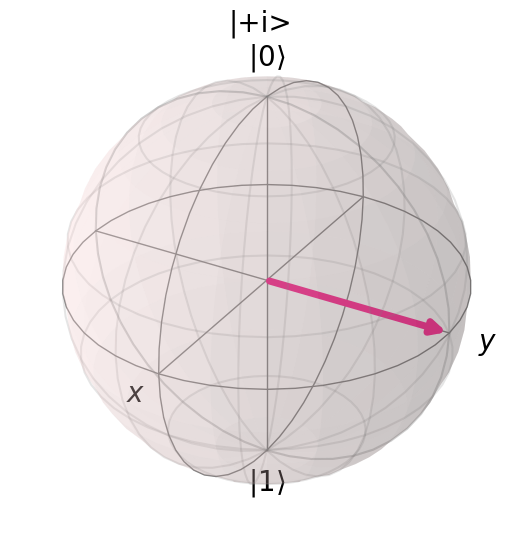

In [32]:
plot_bloch_vector(state5,'|+i>')

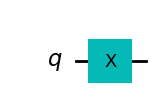

In [33]:
qc_xg = QuantumCircuit(1)
qc_xg.x(0)
qc_xg.draw('mpl')

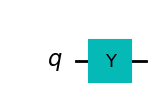

In [34]:
qc_yg = QuantumCircuit(1)
qc_yg.y(0)
qc_yg.draw('mpl')

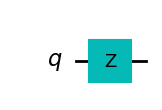

In [35]:
qc_zg = QuantumCircuit(1)
qc_zg.z(0)
qc_zg.draw('mpl')

In [36]:
import numpy as np
plus = np.asarray(([1 / math.sqrt(2)],
                   [1 / math.sqrt(2)]))
X = np.asarray(([0, 1], [1, 0]))
result = X @ plus
print(result)

[[0.70710678]
 [0.70710678]]


In [37]:
minus = np.asarray(([1 / math.sqrt(2)],
                   [-1 / math.sqrt(2)]))
X = np.asarray(([0, 1], [1, 0]))
result = X @ minus
print(result)

[[-0.70710678]
 [ 0.70710678]]


In [38]:
import scipy.linalg as al
Y = np.asarray(([0, -1j], [1j, 0]), dtype='complex')
results = al.eig(Y)
print(results[1])

[[-0.        -0.70710678j  0.70710678+0.j        ]
 [ 0.70710678+0.j          0.        -0.70710678j]]


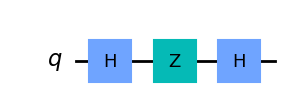

In [39]:
qc_eg = QuantumCircuit(1)
qc_eg.h(0)
qc_eg.z(0)
qc_eg.h(0)
qc_eg.draw('mpl')

In [45]:
output = execute(qc_eg,Aer.get_backend('statevector_simulator')).result().get_statevector()
print(output)

Statevector([6.123234e-17+0.j, 1.000000e+00+0.j],
            dims=(2,))


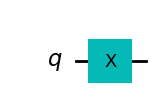

In [46]:
qc_eg2 = QuantumCircuit(1)
qc_eg2.x(0)
qc_eg2.draw('mpl')

In [47]:
output = execute(qc_eg2,Aer.get_backend('statevector_simulator')).result().get_statevector()
print(output)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


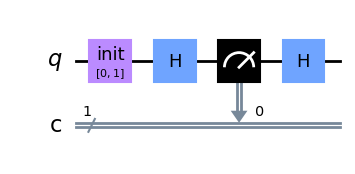

In [48]:
def x_measurement(qc,qubit,cbit):
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

from qiskit.extensions import Initialize
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initializer = Initialize(initial_state)
initializer.label = "init"
qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw('mpl')

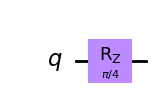

In [49]:
qc_rz = QuantumCircuit(1)
qc_rz.rz(math.pi/4,0) #Applying R-z Gate with phi = PI/4
qc_rz.draw('mpl')

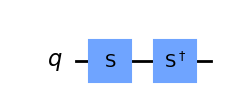

In [50]:
qc_s = QuantumCircuit(1)
qc_s.s(0) #Applying the S Gate
qc_s.sdg(0) #Applying the S-Inverse Gate
qc_s.draw('mpl')

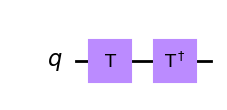

In [51]:
qc_t = QuantumCircuit(1)
qc_t.t(0) #Applying the T Gate
qc_t.tdg(0) #Applying the T-Inverse Gate
qc_t.draw('mpl')